In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score,classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

In [21]:
df=pd.read_csv("placement-dataset.csv")
df

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [23]:
x=df[["cgpa","iq"]]

In [27]:
y=df["placement"]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model=LogisticRegression()

In [33]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [49]:
ypred=model.predict(xtest)

In [51]:
ypred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [55]:
confusion_matrix(ytest,ypred)

array([[9, 1],
       [2, 8]])

In [57]:
print(accuracy_score(ytest,ypred))

0.85


In [59]:
print(precision_score(ytest,ypred))

0.8888888888888888


In [61]:
print(recall_score(ytest,ypred))

0.8


In [63]:
print(f1_score(ytest,ypred))

0.8421052631578947


In [65]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [77]:
clf = SVC(kernel='linear')
clf.fit(x, y)

SVC(kernel='linear')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


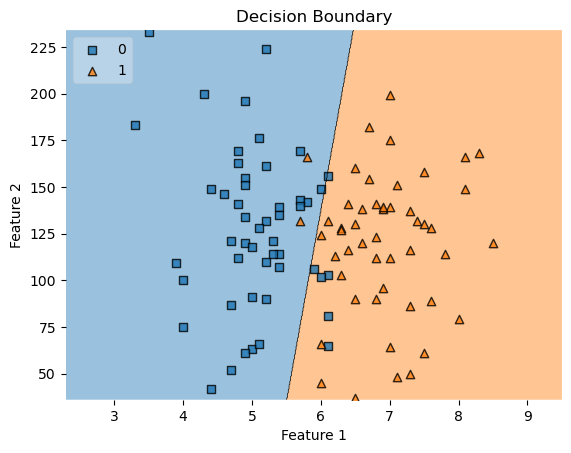

In [85]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=clf, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

# CHATGPT DATASET FOR BINARY CLASSIFICATION

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [110]:
df=pd.read_csv("/Users/abhishekmahto/Downloads/binary_classification_dataset.csv")
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-0.765571,1.634059,2.350798,2.225022,3.611369,0.344677,0.895865,0.696777,0.259022,-0.261373,0
1,1.785566,-0.620414,4.129646,2.234917,0.164374,-0.280756,-0.168279,-3.824665,-0.535257,-0.860574,0
2,-1.025372,-3.808895,0.331933,3.317601,1.611008,-0.313233,-1.022974,-2.833000,-0.895580,-1.069195,1
3,3.137808,2.105017,-0.125320,-1.189536,1.811437,-0.006486,0.852302,-1.430743,0.587882,2.189589,1
4,3.415090,1.189810,-0.386084,-0.231598,2.439817,-1.075501,-0.671844,-2.975087,-1.540595,0.877743,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,2.285917,1.704376,4.597607,1.292557,0.846725,-1.510968,0.934903,-2.417387,-0.797368,-0.432011,0
9996,1.027975,0.839797,1.748573,-0.028473,-0.530237,0.734323,0.251432,-0.772863,0.517318,1.426572,0
9997,-0.408447,-0.357702,1.063182,-0.018103,-1.657547,0.120252,0.192621,0.144554,-3.713341,-0.271264,0
9998,0.334355,0.955196,-2.053360,-0.652811,2.335463,0.521932,0.518656,0.855633,1.487735,-0.342401,1


In [112]:
x=df.drop(columns=["Target"])

In [114]:
y=df["Target"]
y

0       0
1       0
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Target, Length: 10000, dtype: int64

In [116]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [118]:
# Standardize features
scaler = StandardScaler()
xtrainscaler=scaler.fit_transform(xtrain)
xtestscaler=scaler.fit_transform(xtest)

In [120]:
# MODEL SELECTION
model= LogisticRegression()
model.fit(xtrainscaler,ytrain)

LogisticRegression()

In [124]:
ypred=model.predict(xtestscaler)

In [126]:
accuracy_score(ytest,ypred)

0.764

In [128]:
accuracy = accuracy_score(ytest, ypred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.76


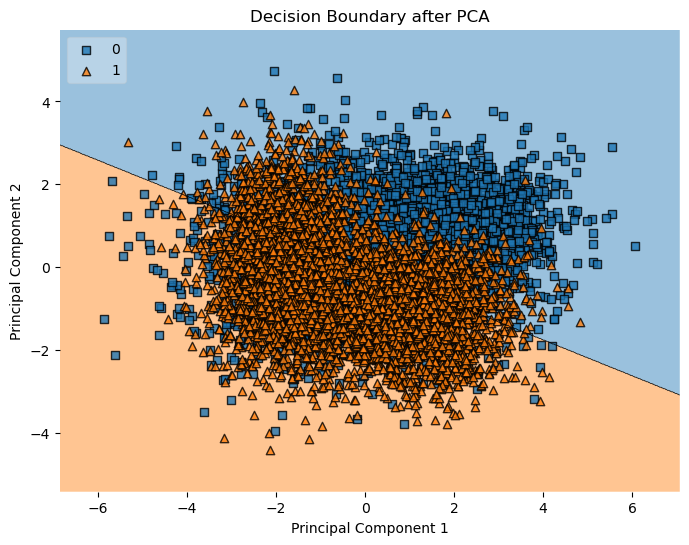

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Load dataset
df = pd.read_csv("/Users/abhishekmahto/Downloads/binary_classification_dataset.csv")

# Split features and target
X = df.drop(columns=["Target"])
y = df["Target"].to_numpy()  # ✅ Convert y to a NumPy array

# Reduce dimensionality to 2D using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, y, clf=model, legend=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary after PCA")
plt.show()


# BAR CHART OF BINARY CLASSIFICATION ACCURACY,PRECISION,RECALL,F1SCORE,SUPPORT CHART

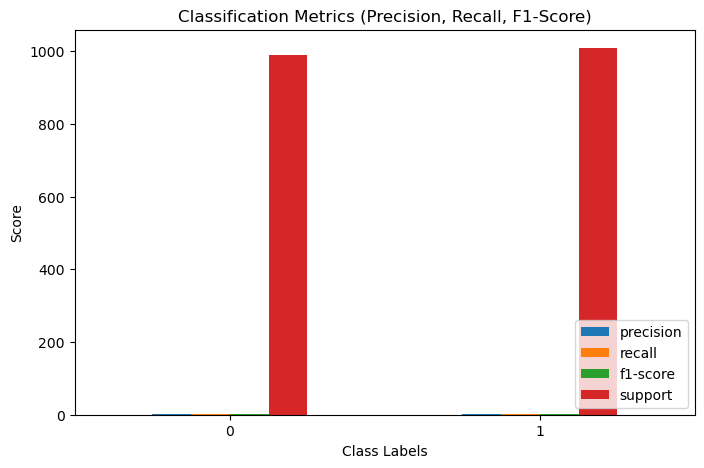

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("/Users/abhishekmahto/Downloads/binary_classification_dataset.csv")

# Split features and target
X = df.drop(columns=["Target"])
y = df["Target"].to_numpy()  # Convert y to NumPy array

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA for visualization (optional for decision boundary)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Remove 'accuracy', 'macro avg', 'weighted avg'
metrics = ["precision", "recall", "f1-score"]

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(report).T.iloc[:-3]  # Removing last 3 rows (accuracy & averages)

# Plot the metrics
fig, ax = plt.subplots(figsize=(8, 5))
metrics_df.plot(kind="bar", ax=ax)
plt.title("Classification Metrics (Precision, Recall, F1-Score)")
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
